In [13]:
# Avoid interference with GDAL from other external software due to environment variables used: GDAL_DATA and PROJ_LIB

import os
import getpass

usuario = getpass.getuser()

# os.environ['GDAL_DATA'] = f'/opt/anaconda3/envs/geoenv/share/gdal'
# os.environ['PROJ_LIB'] = f'/opt/anaconda3/envs/geoenv/share'

# en windows, NECESARIO EN AULA y seguramente en equipos con la misma instalación y SO
os.environ['GDAL_DATA'] = f'C:\\Users\\{usuario}\\anaconda3\\envs\\advprog\\Library\\share\\gdal'
os.environ['PROJ_LIB'] = f'C:\\Users\\{usuario}\\anaconda3\\envs\\advprog\\Library\\share\\proj'
os.environ['PATH'] = f'C:\\Users\\{usuario}\\anaconda3\\envs\\advprog\\Library\\bin'

In [22]:
import pandas as pd
import geopandas as gpd
import numpy as np
import xarray
import shapely
import sys
import os
import matplotlib.pyplot as plt
from shapely.geometry import Point
from pyproj import CRS
import contextily as ctx


In [15]:
sys.argv[1] = "C:\\Users\\angel\\Documents\\Programacion_avanzada\\practicas\\Geodatos\\"

In [16]:
eucal_cant = gpd.read_file(sys.argv[1] + "eucal_cant.shp")
cantabria = gpd.read_file(sys.argv[1] + "shp_cantabria\\cantabria.shp")

In [20]:
cantabria = cantabria.to_crs(eucal_cant.crs)


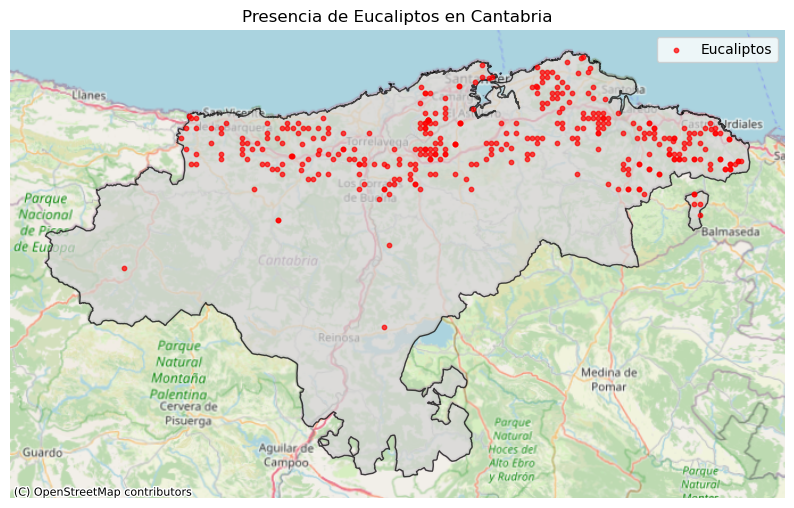

In [23]:
fig, ax = plt.subplots(figsize=(10, 10))

#límites de Cantabria.
cantabria.plot(ax=ax, edgecolor='black', color='lightgray', alpha=0.7)

# Dibujar puntos de eucaliptos.
eucal_cant.plot(ax=ax, marker='o', c='red', markersize=10, alpha=0.7, label='Eucaliptos')

# Añadir fondo de mapa con tiles de OpenStreetMap
ctx.add_basemap(ax, crs=eucal_cant.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)

# Mejorar el diseño
plt.title("Presencia de Eucaliptos en Cantabria")
plt.legend()

# Quitar ejes para que quede más limpio
ax.set_axis_off()

plt.show()
